In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr  3 10:08:51 2018
@author: Eric
"""
%matplotlib inline

#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#from sklearn import svm, datasets


In [2]:
#importer les données en têtes col

df_infos_col = pd.read_csv('col_description.csv', sep=';')
df_infos_col.head(30)

,Col_id,Col_nom,Col_infos,Value,Value_infos,Value_type,Variable_type,Col_active,Col_Raw
0,1,MSSubClass,Identifies the type of dwelling involved in t...,20,1-STORY 1946 & NEWER ALL STYLES,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
1,1,MSSubClass,Identifies the type of dwelling involved in t...,30,1-STORY 1945 & OLDER,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
2,1,MSSubClass,Identifies the type of dwelling involved in t...,40,1-STORY W/FINISHED ATTIC ALL AGES,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
3,1,MSSubClass,Identifies the type of dwelling involved in t...,45,1-1/2 STORY - UNFINISHED ALL AGES,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
4,1,MSSubClass,Identifies the type of dwelling involved in t...,50,1-1/2 STORY FINISHED ALL AGES,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
5,1,MSSubClass,Identifies the type of dwelling involved in t...,60,2-STORY 1946 & NEWER,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
6,1,MSSubClass,Identifies the type of dwelling involved in t...,70,2-STORY 1945 & OLDER,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
7,1,MSSubClass,Identifies the type of dwelling involved in t...,75,2-1/2 STORY ALL AGES,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
8,1,MSSubClass,Identifies the type of dwelling involved in t...,80,SPLIT OR MULTI-LEVEL,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
9,1,MSSubClass,Identifies the type of dwelling involved in t...,85,SPLIT FOYER,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...


In [3]:
class Col():
    def set_Col_Nom(self, nom):
        self.nom = nom
    
    def get_Col_Nom(self):
        return self.nom
        
    def set_Col_ID(self, ID):
        self.ID = ID
    
    def get_Col_ID(self):
        return self.ID
    
    def set_Col_Active(self, active):
        self.active = active
    
    def get_Col_Active(self):
        return self.active
    
    def set_Col_Raw(self, raw):
        self.raw = raw
    
    def get_Col_Raw(self):
        return self.raw
    
    def set_Col_Variable_Type(self, variable_type):
        self.variable_type = variable_type
    
    def get_Col_Variable_Type(self):
        return self.variable_type
  

    
class ItemCol(Col):
    
    def set_ItemCol_Value(self, value):
        self.value = value
    
    def get_ItemCol_Value(self):
        return self.value 
    
    def set_ItemCol_Value_Infos(self, value_infos):
        self.value_infos = value_infos
    
    def get_ItemCol_Value_Infos(self):
        return self.value_infos     
    
    def set_ItemCol_Value_Type(self, value_type):
        self.value_type = value_type
    
    def get_ItemCol_Value_Type(self):
        return self.value_type
    
#=================================================================    

class Params():
    
    def set_import_from_df(self, df_infos_col):
        #Création des class Items Colonnes
        list_Item_Col = []

        for i in range(0, len(df_infos_col.index)) :

            item = ItemCol()

            item.set_Col_ID ( df_infos_col.at[i, 'Col_id'] )
            item.set_Col_Nom ( df_infos_col.at[i, 'Col_nom'] )
            #item.set ( df_infos_col.at[i, 'Col_infos'] )
            item.set_ItemCol_Value( df_infos_col.at[i, 'Value'] )
            item.set_ItemCol_Value_Infos( df_infos_col.at[i, 'Value_infos'] )
            item.set_ItemCol_Value_Type( df_infos_col.at[i, 'Value_type'] )
            item.set_Col_Variable_Type( df_infos_col.at[i, 'Variable_type'] )
            item.set_Col_Active( df_infos_col.at[i, 'Col_active'] )
            item.set_Col_Raw( df_infos_col.at[i, 'Col_Raw'] )


            #print(df_infos_col.at[i, 'Col_nom'])
            #print(item.get_ItemCol_Value_Infos())

            list_Item_Col.append(item)
            self.set_List_Item_Col(list_Item_Col)

    def set_import_fromCSV(self, file) :
        df_infos_col = pd.read_csv(file, sep=';')
        return self.set_import_from_df(df_infos_col)
    
    
    def set_List_Item_Col(self, list_ItemCol):
        self.list_item_col = list_ItemCol
    
    def get_List_Item_Col():
        return self.list_item_col
    
    def get_ItemCol_Active(self):
        list_item_col = self.list_item_col
        
        list_item_col_active = []
        
        for itemCol in list_item_col :
            if itemCol.get_Col_Active :
                list_item_col_active.append(itemCol)
        return list_item_col_active
    
    def get_All_Col_Active(self):
        
        list_item_col = self.list_item_col        
        list_item_col_active = []
        
        for itemCol in list_item_col :
            #print(itemCol.get_Col_Active())
            if itemCol.get_Col_Active() == 1 :
                list_item_col_active.append(itemCol.get_Col_Nom())
        
        list_item_col_active = list(set(list_item_col_active))
                
        return list_item_col_active
    
    def set_Col_Active(self, nom_col, active):
        list_item_col = self.list_item_col
        list_item_col_new = []
        
        for itemCol in list_item_col :
            if itemCol.get_Col_Nom() == nom_col :
                itemCol.set_Col_Active(active)
            
            list_item_col_new.append(itemCol)
        
        self.list_item_col = list_item_col_new
        

    def set_All_Col_Active(self, active):
        
        list_item_col = self.list_item_col
        list_item_col_new = []
        
        for itemCol in list_item_col :
            itemCol.set_Col_Active(active)            
            list_item_col_new.append(itemCol)
        
        self.list_item_col = list_item_col_new
        
    def infos(self):
        list_item_col = self.list_item_col
        
        #np_df = np.array([])
        tab_df = []
        
        list_en_tete = ['Col_id','Col_nom', 'Value','Value_infos', 'Value_type', 'Variable_type', 'Col_active','Col_Raw' ]
        
        for item in list_item_col :
            #ligne = []
            ligne = [
            item.get_Col_ID (),
            item.get_Col_Nom (),
            #item.get ( df_infos_col.at[i, 'Col_infos'] )
            item.get_ItemCol_Value(),
            item.get_ItemCol_Value_Infos(),
            item.get_ItemCol_Value_Type(),
            item.get_Col_Variable_Type(),
            item.get_Col_Active(),
            item.get_Col_Raw()]
            #print(ligne)
            tab_df.append(ligne)
        
        #print(tab_df)
        df = pd.DataFrame(tab_df, columns= list_en_tete)
        
        return df
    
    
    def get_Item_Numeric_Ordinale(self):
        list_item_col = self.list_item_col        
        list_item_col_Num_Ord = []
        
        for itemCol in list_item_col :
            #print(itemCol.get_ItemCol_Value_Infos())     
            if (str(itemCol.get_ItemCol_Value_Type()) == 'Numeric' and str(itemCol.get_Col_Variable_Type()) == 'Ordinale' and itemCol.get_Col_Active() == 1) :
                list_item_col_Num_Ord.append(itemCol)
       
                
        return list_item_col_Num_Ord
    
    def get_Col_Numeric_Ordinale(self):
        list_item_col = self.list_item_col        
        list_item_col_Num_Ord = []
        
        for itemCol in list_item_col :
            
            #print(itemCol.get_Col_Variable_Type())
            #print(itemCol.get_ItemCol_Value_Type())            
            if (str(itemCol.get_ItemCol_Value_Type()) == 'Numeric' and str(itemCol.get_Col_Variable_Type()) == 'Ordinale' and itemCol.get_Col_Active() == 1) :
                #print('ok')
                list_item_col_Num_Ord.append(itemCol.get_Col_Nom())
       
        list_item_col_Num_Ord = list(set(list_item_col_Num_Ord))        
        return list_item_col_Num_Ord
    
    def get_Col_String_Nominale(self):
        list_item_col = self.list_item_col        
        list_item_col_Str_Nomi = []
        
        for itemCol in list_item_col :
            
            #print(itemCol.get_Col_Variable_Type())
            #print(itemCol.get_ItemCol_Value_Type())            
            if (str(itemCol.get_ItemCol_Value_Type()) == 'String' and str(itemCol.get_Col_Variable_Type()) == 'Nominale' and itemCol.get_Col_Active() == 1) :
                #print('ok')
                list_item_col_Str_Nomi.append(itemCol.get_Col_Nom())
       
        list_item_col_Str_Nomi = list(set(list_item_col_Str_Nomi))        
        return list_item_col_Str_Nomi
                

In [4]:
#Création des params
Kaggle_Params = Params()

Kaggle_Params.set_import_from_df(df_infos_col)

#Kaggle_Params.set_import_fromCSV('col_description.csv')

In [5]:
Kaggle_Params.set_All_Col_Active(1)

In [6]:
Kaggle_Params.infos().head(5)

,Col_id,Col_nom,Value,Value_infos,Value_type,Variable_type,Col_active,Col_Raw
0,1,MSSubClass,20,1-STORY 1946 & NEWER ALL STYLES,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
1,1,MSSubClass,30,1-STORY 1945 & OLDER,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
2,1,MSSubClass,40,1-STORY W/FINISHED ATTIC ALL AGES,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
3,1,MSSubClass,45,1-1/2 STORY - UNFINISHED ALL AGES,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...
4,1,MSSubClass,50,1-1/2 STORY FINISHED ALL AGES,Numeric,Ordinale,1,MSSubClass: Identifies the type of dwelling in...


In [7]:
list_string_nominale = Kaggle_Params.get_Col_String_Nominale()
list_string_nominale

['Street',
 'LandSlope',
 'Exterior1st',
 'RoofMatl',
 'Alley',
 'Functional',
 'Heating',
 'Electrical',
 'PavedDrive',
 'Exterior2nd',
 'MiscFeature',
 'LandContour',
 'GarageFinish',
 'Condition2',
 'Foundation',
 'SaleCondition',
 'Utilities',
 'Condition1',
 'LotShape',
 'LotConfig',
 'HouseStyle',
 'BldgType',
 'Neighborhood',
 'RoofStyle',
 'GarageType',
 'MSZoning',
 'MasVnrType',
 'SaleType']

In [8]:
list_num_ord = Kaggle_Params.get_Col_Numeric_Ordinale()
list_num_ord

['BsmtUnfSF',
 'GrLivArea',
 'BsmtFullBath',
 'Fireplaces',
 '3SsnPorch',
 'LotArea',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'OpenPorchSF',
 'EnclosedPorch',
 'LowQualFinSF',
 'ScreenPorch',
 'MSSubClass',
 '2ndFlrSF',
 'FullBath',
 'YearRemodAdd',
 'OverallQual',
 'MiscVal',
 'PoolArea',
 'BsmtFinSF2',
 'OverallCond',
 'MoSold',
 'LotFrontage',
 'WoodDeckSF',
 '1stFlrSF',
 'YrSold',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'BedroomAbvGr',
 'HalfBath']

In [9]:
#importer les data du fichier train
df_train_raw = pd.read_csv('train.csv', index_col = 0)

index_col_Y = 79
name_col_Y = df_train_raw.columns.values[index_col_Y]
print(name_col_Y)

#print('Shape train_raw : ')
#print(df_train_raw.shape)
#print(df_train_raw.head(10))

#importer les data du fichier test
df_test_raw = pd.read_csv('test.csv')
#print('Shape test_raw : ')
#print(df_test_raw.shape)
df_test_raw.head(5)

df_train_raw.describe()

SalePrice


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df_train_raw.columns.shape


(80,)

In [11]:
#Split le fichier train pour garder une partie de test

#df_split_train, df_split_test = np.split(df_train_clean, [int(.8*len(df_train_clean))])
df_split_train, df_split_test = train_test_split(df_train_raw, test_size=0.2)

#df_train_raw = df_split_train

df_split_train.describe()
df_train_raw

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [12]:
df_train_raw.interpolate()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,63.0,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [13]:
#Extraction col des df
def extract_df_col(df, list_col):    
    return df[list_col]

In [14]:
extract_df_col(df_split_train, list_num_ord)

,BsmtUnfSF,GrLivArea,BsmtFullBath,Fireplaces,3SsnPorch,LotArea,TotalBsmtSF,TotRmsAbvGrd,KitchenAbvGr,YearBuilt,...,MoSold,LotFrontage,WoodDeckSF,1stFlrSF,YrSold,BsmtHalfBath,GarageCars,GarageArea,BedroomAbvGr,HalfBath
Id,,,,,,,,,,,,,,,,,,,,,
778,102,894,1,1,0,13350,864,5,1,1974,...,6,100.0,241,894,2006,0,2,440,3,0
1431,732,1838,0,1,0,21930,732,7,1,2005,...,7,60.0,100,734,2006,0,2,372,4,1
1013,602,1502,0,2,0,10592,602,7,1,1923,...,8,55.0,96,900,2007,0,1,180,3,1
1302,224,1494,0,2,0,7500,771,7,1,1942,...,11,NaN,0,753,2009,0,1,213,3,0
258,270,1604,1,1,0,8814,1604,8,1,2006,...,3,68.0,123,1604,2009,0,2,660,3,1
390,402,2332,1,1,0,12474,1682,9,1,2007,...,8,96.0,196,1742,2008,0,3,846,3,1
80,440,1230,0,0,0,10440,440,5,1,1910,...,5,60.0,74,682,2009,0,2,440,2,1
839,1099,1099,0,0,0,9525,1099,6,1,1995,...,6,75.0,278,1099,2008,0,1,352,3,1
719,138,2418,1,1,0,10542,1311,9,1,1993,...,8,96.0,250,1325,2008,0,3,983,3,1


In [15]:
mes_NaN = calculer_NB_NaN_Col(extract_df_col(df_split_train, list_num_ord))
mes_NaN.sort_values(ascending= False)

NameError: name 'calculer_NB_NaN_Col' is not defined

In [ ]:
plt.scatter(x=df_split_train['GrLivArea'], y=(df_split_train['SalePrice']), alpha = 0.69)
plt.ylabel('Sale Price')
plt.xlabel('GrLivArea')
plt.style.use(style = 'ggplot')
plt.show()

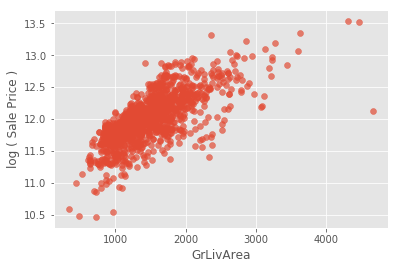

In [103]:


plt.scatter(x=df_split_train['GrLivArea'], y=np.log(df_split_train['SalePrice']), alpha = 0.69)
plt.ylabel('log ( Sale Price )')
plt.xlabel('GrLivArea')
plt.style.use(style = 'ggplot')
plt.show()

In [32]:
#Nettoyage des données
def clean_df_train(df) :

    #df['Sex'].replace('male', 0, inplace=True)
    #df['Sex'].replace('female', 1, inplace=True)
    #df['Sex'].replace('', np.nan, inplace=True)
    #df.dropna(subset=['Sex'], inplace=True)
    df.dropna(inplace=True)
    
    return df


#df_train_clean  = clean_df_train(df_train_raw)
#print('Shape df_train_clean :\n', df_train_clean.shape, '\n', df_train_clean.head(10))

In [33]:
#Extraire les données
data_X = df_train_raw.iloc[:,0:index_col_Y - 1]
data_Y = df_train_raw.iloc[:,index_col_Y -1 : index_col_Y + 1]
data_Y = data_Y.drop(data_Y.columns[[0]], axis=1)

list_X_col_names = data_X.columns.tolist()
np.array(list_X_col_names).shape
#data_X

(78,)

In [34]:
listTest = ['toto', 'titi']
result = []



for element in listTest:
        result.append('to_'+ str(element))

result

['to_toto', 'to_titi']

In [36]:
#Travail sur les colonnes OneHot Encoding


#Faire la liste des colonnes créées


def df_extract_one_hot_dup(df, col):
    df_tempo = df
    df = df[col]
    df = df.str.get_dummies()
    nom_col = df.columns
    
    new_names_col = []
    
    for element in nom_col:
        new_names_col.append(str(col) + '_' + str(element))
        
    df.columns = new_names_col 
    
    nom_col = new_names_col
    df = pd.concat([df_tempo, df], axis=1, join='inner')
    return df, nom_col

def df_extract_col_one_hot_dup(df, listCol):
    list_colo = []
    for col in listCol :
        df, noms_col = df_extract_one_hot_dup(df, col)
        #list_colo = list_colo + noms_col.tolist()
        for colo in noms_col : 
            list_colo.append(colo)
        #list_colo = noms_col.tolist()
    return df, list_colo




#==========================================================
def df_extract_one_hot(df, col):
    df_tempo = df
    df = df[col]
    df = df.str.get_dummies()
    nom_col = df.columns
    #df = pd.concat([df_tempo, df], axis=1, join='inner')
    return df, nom_col


def df_extract_col_one_hot(df, listCol):
    list_colo = []
    for col in listCol :
        df, noms_col = df_extract_one_hot(df, col)
        list_colo = list_colo + noms_col.tolist()
        #list_colo = noms_col.tolist()
    return df, list_colo


In [51]:
my_df, my_list = df_extract_one_hot_dup(data_X, 'Street')
my_df.head(5)
#my_list

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,Street_Grvl,Street_Pave
Id,,,,,,,,,,,,,,,,,,,,,
27,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,0,1
733,60,RL,75.0,11404,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,0,1
460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,0,1
150,50,RM,NaN,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,0,1
242,30,RM,40.0,3880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,0,1


In [38]:
data_X_objet, list_col = df_extract_col_one_hot_dup(data_X, list_X_objet_col_names)
data_X_objet.head(20)
#list_col

NameError: name 'list_X_objet_col_names' is not defined

In [ ]:
def extract_data_numeric(df):
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    #newdf = df.select_dtypes(include=numerics)
    #newdf = df.select_dtypes(exclude=['object'])  
    newdf = df.select_dtypes(include=[np.number])
    list_col_names = df.select_dtypes(include=[np.number]).columns.tolist()
    
    return newdf, list_col_names

In [30]:
def calculer_NB_NaN_Col(df):
        
    tab_nan = df.isnull().values
    #df2.sum()
    df2 = pd.DataFrame(tab_nan)
    
    return df.isnull().sum()




In [ ]:
#Extraire les données numériques
data_X_num, list_X_num_col_names = extract_data_numeric(data_X)

#Récupérer les colonnes non numériques
set_X_col_names  = set(list_X_col_names)
set_X_num_col_names = set(list_X_num_col_names)
set_X_objet_col_names = set_X_col_names - set_X_num_col_names
list_X_objet_col_names = list(set_X_objet_col_names)


In [ ]:
calculer_NB_NaN_Col(data_X_num)
#data_X_num.head(20)

In [ ]:
data_X_num_sans_NaN = replace_NaN_by_median_col(data_X_num)

calculer_NB_NaN_Col(replace_NaN_by_median_col(data_X_num))


In [ ]:
data_X_objet, list_col_objet = df_extract_col_one_hot_dup(data_X, list_X_objet_col_names)
data_X_objet

data_X_objet = data_X_objet[list_col]
list_col_objet

In [ ]:
def replace_NaN_by_median_col(df):    
    newdf = df.fillna( df.median() )    
    return newdf

data_X_num = replace_NaN_by_median_col(data_X_num)
print('data_X : \n',data_X_num, '\nCol names numériques : \n', list_X_num_col_names)
#print('data_Y : \n',data_Y)

In [ ]:
data_X_objet = replace_NaN_by_median_col(data_X_objet)
data_X_objet.to_csv('toto.csv')

In [29]:
#df_X = pd.concat([data_X_num, data_X_objet], axis=1, join='inner')
df_X = data_X_num_sans_NaN
#df_X = data_X_objet


#Convertir les df en np arrays  

Y = np.array(data_Y.iloc[:,0])
#print(Y.shape)

X = np.array(df_X)
df_X.columns
list_X_num_col_names

#X.shape

NameError: name 'data_X_num_sans_NaN' is not defined

NameError: name 'X' is not defined

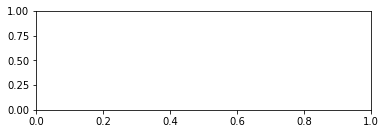

In [26]:
plt.figure()
plt.subplot(2,1,1)
plt.scatter(X[:,0], Y )
plt.title('kfjnbgjkf')

plt.subplot(2,1,2)
plt.scatter(X[:,1], Y )
plt.title('kfjnbgjkf')

plt.subplot(2,1,3)
plt.scatter(X[:,1], Y )
plt.title('kfjnbgjkf')

In [15]:
len(list_X_num_col_names)

NameError: name 'list_X_num_col_names' is not defined

In [28]:
for i in range(0, len(list_X_num_col_names)) :
    plt.figure()
    plt.subplot(2,1,1)
    plt.scatter(X[:,i], Y )
    plt.title(list_X_num_col_names(i))

NameError: name 'list_X_num_col_names' is not defined

In [60]:
# TSNE

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

from sklearn.datasets.samples_generator import make_blobs

X_tnse = X[:,:]

#print(X_tnse)


# Deuxieme figure : on visualise les blobs en 2D grÃ¢ce a l'algorithme T-SNE
tsne = manifold.TSNE(n_components=2, perplexity=30, init='random',
                     random_state=0)
Y_tsne = tsne.fit_transform(X_tnse)
print(Y_tsne.shape)

plt.figure()
plt.scatter(Y_tsne[:, 0], Y_tsne[:,1], c= Y)
plt.show()

NameError: name 'X' is not defined

In [16]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

new_list_X_num_col_names = []

for f in range(X.shape[1]):
    
    new_list_X_num_col_names.append(list_X_num_col_names[indices[f]])
    print("%d. feature %d : %s (%f)" % (f + 1, indices[f], list_X_num_col_names[indices[f]] ,importances[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
#plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=list_X_num_col_names[indices], align="center")
plt.xticks(range(X.shape[1]), new_list_X_num_col_names, rotation = 75)
plt.xlim([-1, X.shape[1]])
plt.show()

NameError: name 'X' is not defined

In [18]:
df_iso = df_X['LotFrontage']
#Convertir les df en np arrays  

Y_iso = np.array(data_Y.iloc[:,0])
#print(Y.shape)

X_iso = np.array(df_iso)

X_iso.shape

NameError: name 'df_X' is not defined

In [19]:
#============ Isolation Forest : Permet de détecter les outliners (renvoi 1 ou -1), on peut y mettre toutes les colonnes du dataset
from sklearn.ensemble import IsolationForest
# fit the model
clf = IsolationForest(max_samples= Y_iso.size, random_state=0)
clf.fit(X_iso)


# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(0, 90, 90), np.linspace(0, 600, 600))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

#b1 = plt.scatter(np_X_train1[:, 0], np_X_train1[:, 1], c='white',               s=20, edgecolor='k')
b1 = plt.scatter(Y_iso, X_iso, c='white',               s=20, edgecolor='k')
b2 = plt.scatter(np_X_test[:, 0], np_X_test[:, 1], c='green',                 s=20, edgecolor='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((0, 100))
plt.ylim((0, 600))
plt.legend([b1, b2],
           ["training observations",
            "new regular observations"],
           loc="upper left")
plt.show()


NameError: name 'Y_iso' is not defined

In [20]:
df_split_train.head(4)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
27,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,134800
733,60,RL,75.0,11404,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,222500
460,50,RL,NaN,7015,Pave,NaN,IR1,Bnk,AllPub,Corner,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,110000
150,50,RM,NaN,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000


In [21]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

data_X
data_Y

df_split_train
df_split_test

#col_choisie = ['LotArea']
col_choisie = list_num_ord

diabetes_X_train = replace_NaN_by_median_col(df_split_train[col_choisie])
diabetes_X_test = df_split_test[col_choisie]
diabetes_y_train = df_split_train[['SalePrice']]
diabetes_y_test = df_split_test[['SalePrice']]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

NameError: name 'data_X' is not defined

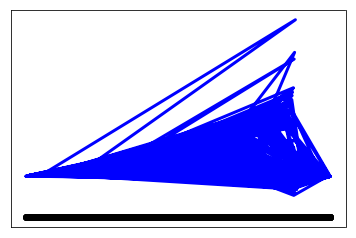

In [22]:
x = df_split_train[['GrLivArea']]
y = df_split_train[['SalePrice']]

regr = linear_model.LinearRegression()
regr.fit(x, y)

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

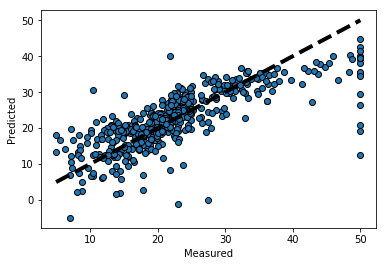

In [23]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
boston = datasets.load_boston()
y = boston.target

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, boston.data, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()